# **BRAIN STROKE PREDICTION**

# **PRML Major Project**

# **Loading Dataset**

In [15]:
!pip install plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
df = pd.read_csv('/content/brain_stroke.csv')
df['smoking_status'].mode()[0]

'never smoked'

# **Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [79]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inspect the first few rows of the DataFrame
print(df.head())



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [80]:
# Inspect the data types of the columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [81]:
# Check for missing values
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [82]:
# Analyze the distribution of the target variable
print(df['stroke'].value_counts())

0    4733
1     248
Name: stroke, dtype: int64


<ipython-input-75-baed6431ca44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

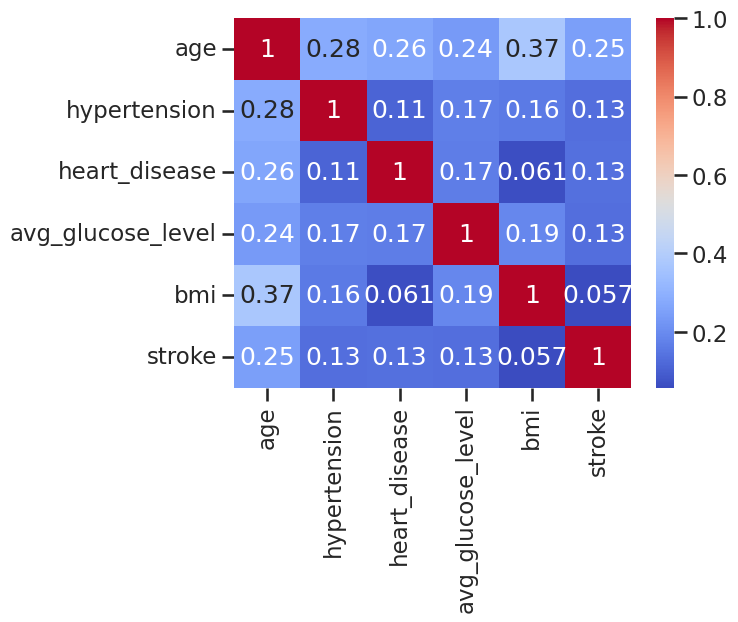

In [75]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


# **Data Visualization**

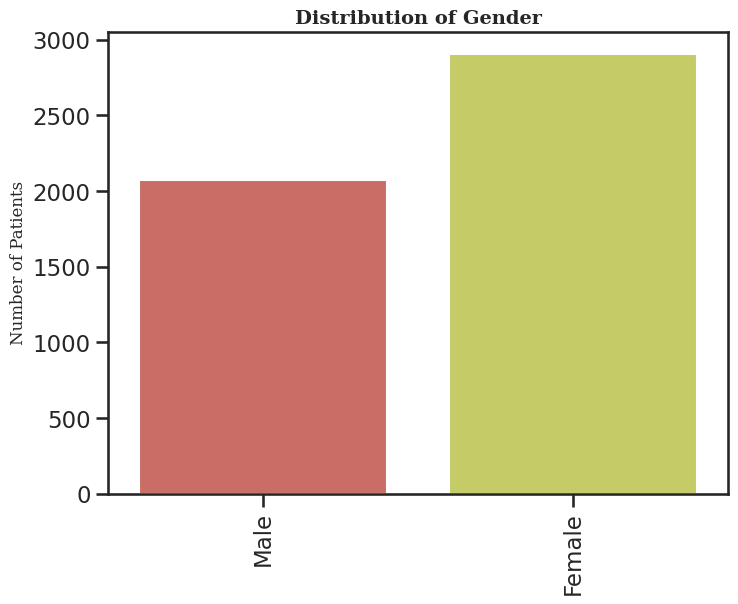

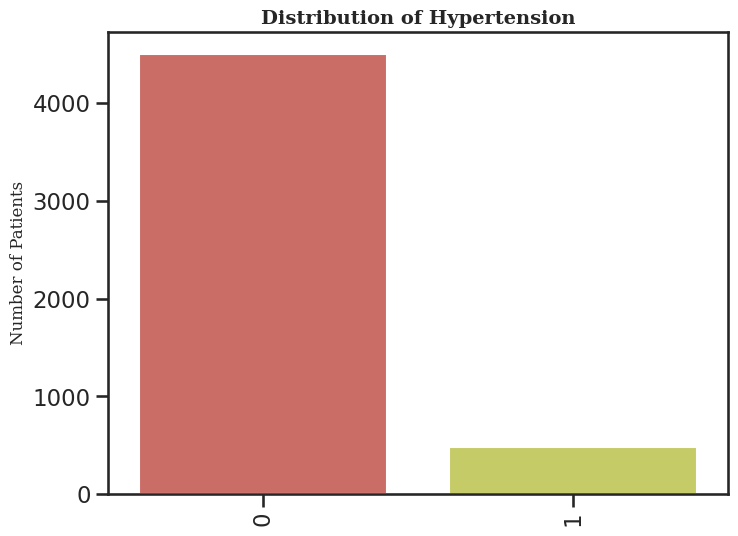

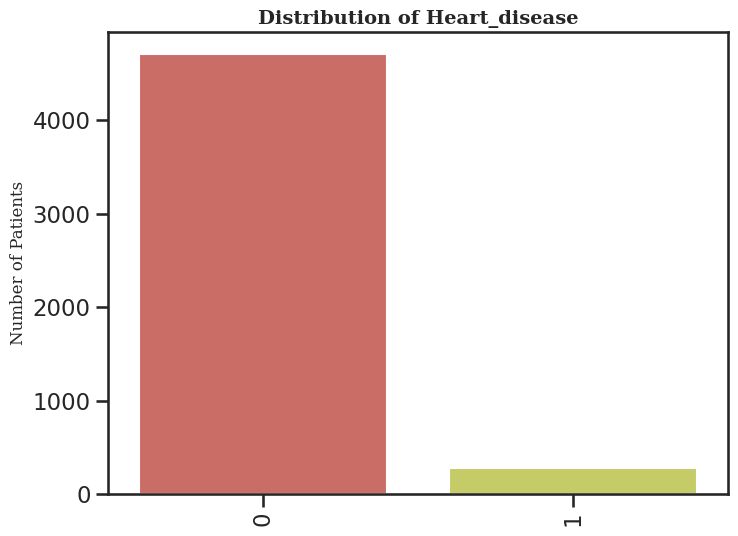

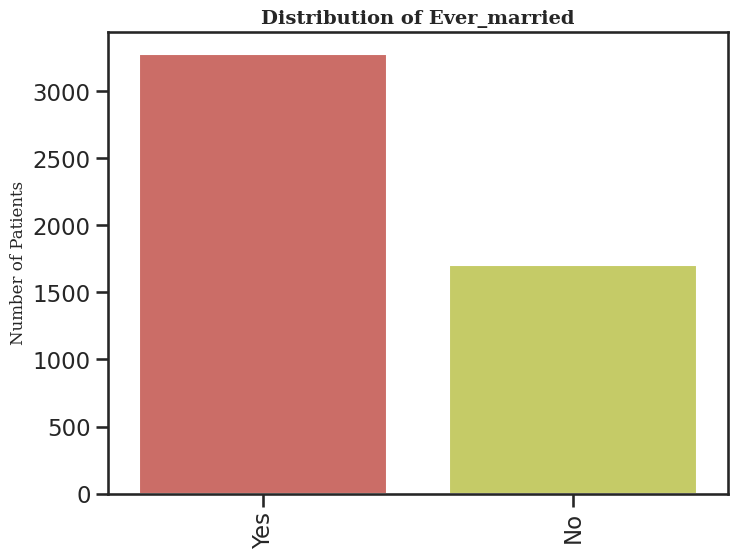

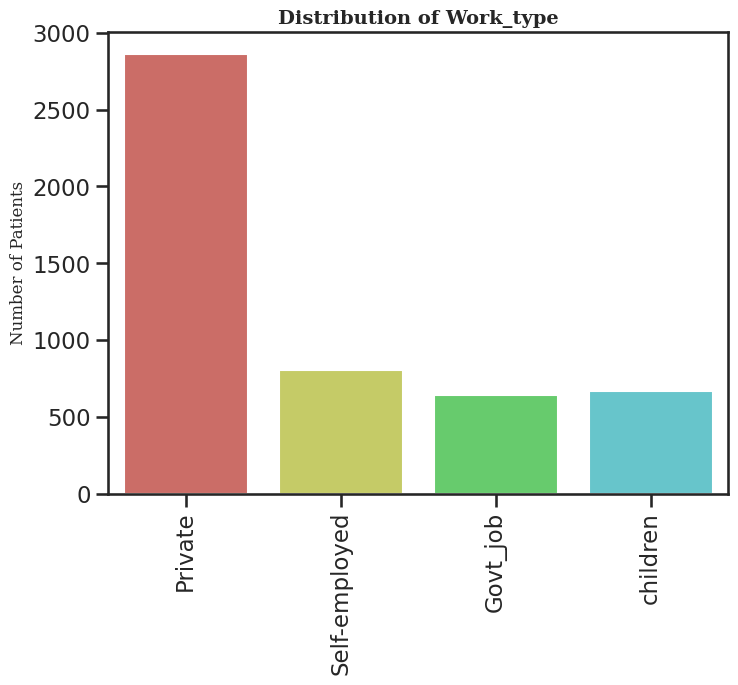

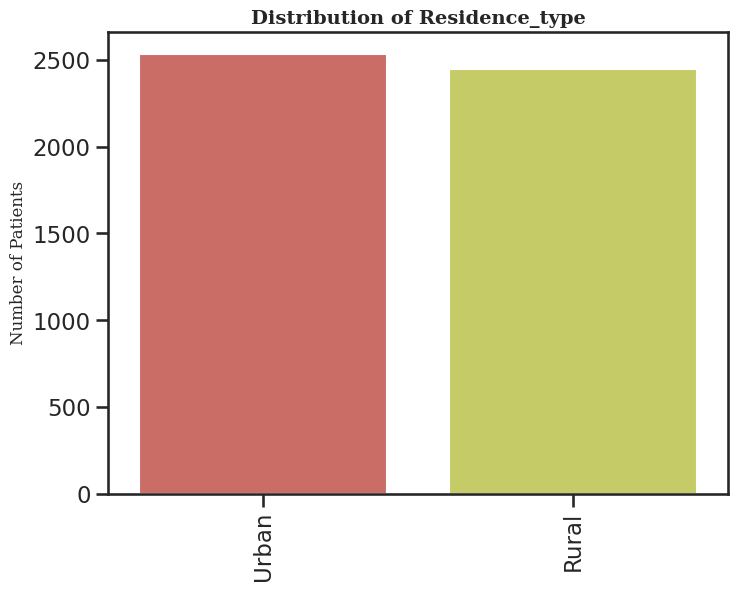

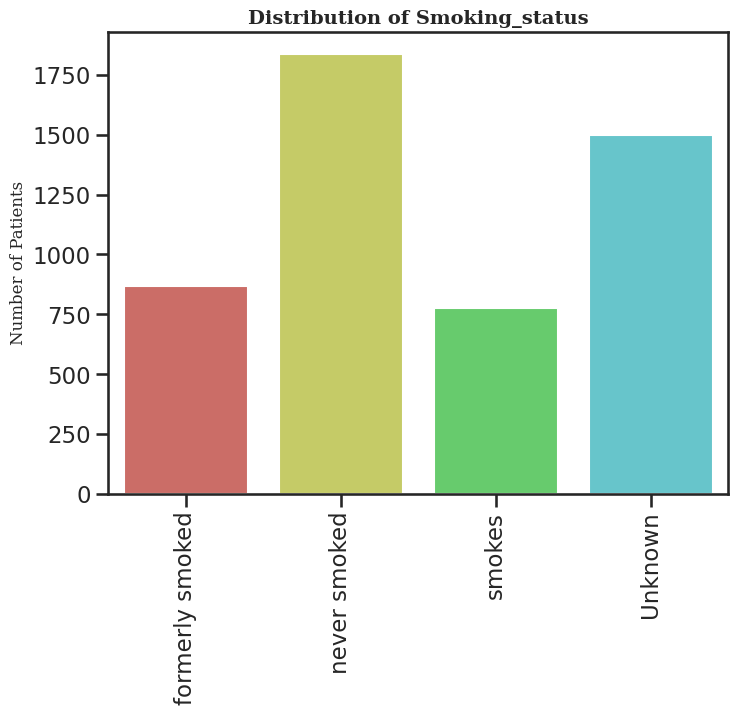

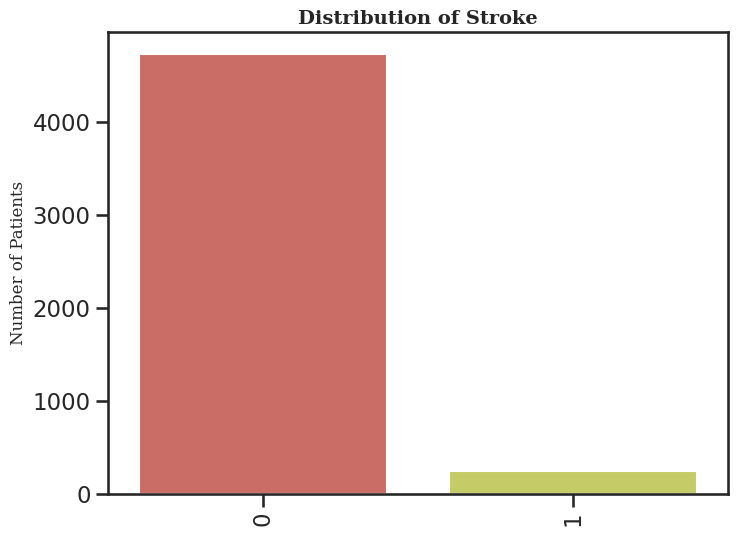

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define font parameters
font = {'family': 'serif', 'weight': 'normal', 'size': 12}

# Select columns for visualization
df_vis = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

# Set custom color palette
sns.set_palette('hls')

# Set style to "ticks" and create count plots for each column
sns.set_style('ticks')
for col in df_vis.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_vis)
    plt.xticks(rotation=90)
    plt.title('Distribution of ' + col.capitalize(), fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
    plt.xlabel('')
    plt.ylabel('Number of Patients', fontdict=font)
    plt.show()


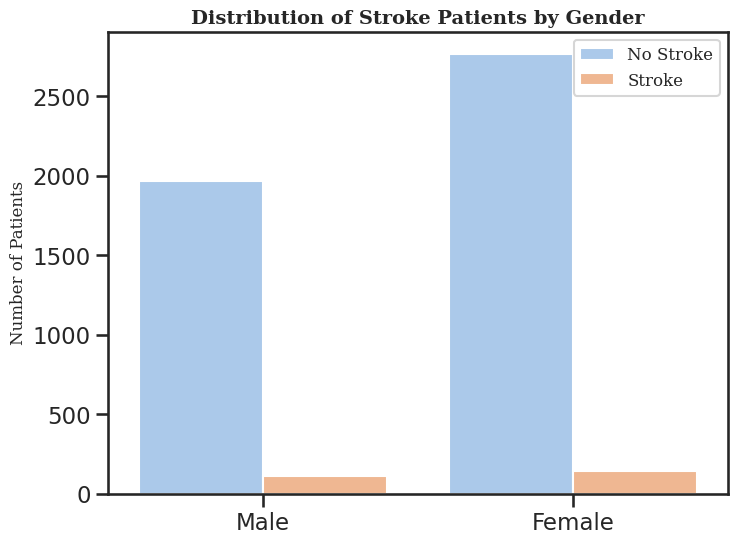

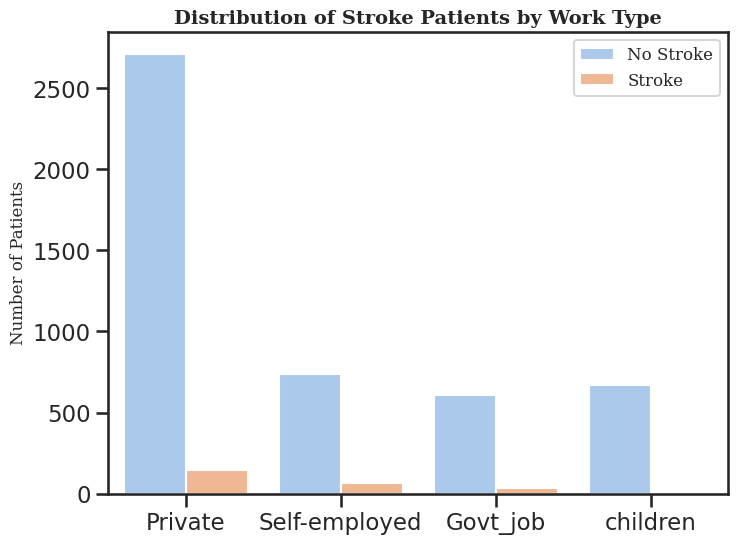

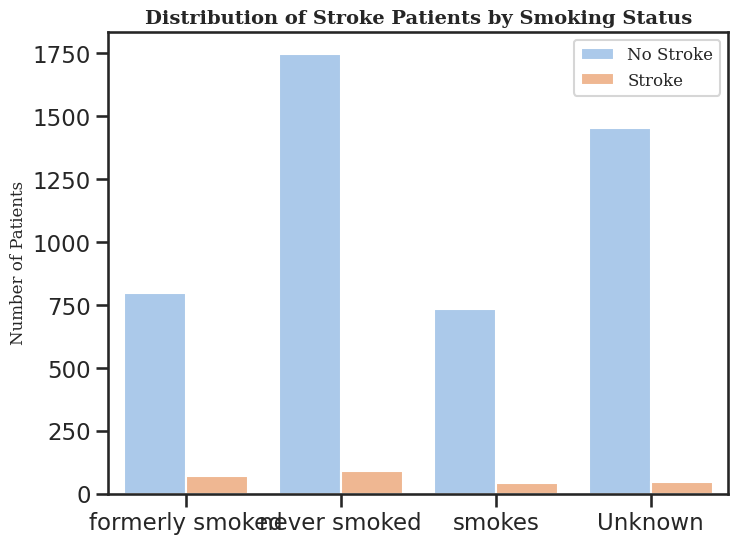

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define font parameters
font = {'family': 'serif', 'weight': 'normal', 'size': 12}

# Create count plot for stroke patients by gender
sns.set_palette('pastel')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Distribution of Stroke Patients by Gender', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel('')
plt.ylabel('Number of Patients', fontdict=font)
plt.legend(['No Stroke', 'Stroke'], prop={'size': 12, 'family': 'serif'})
plt.show()

# Create count plot for stroke patients by work type
sns.set_palette('pastel')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Distribution of Stroke Patients by Work Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel('')
plt.ylabel('Number of Patients', fontdict=font)
plt.legend(['No Stroke', 'Stroke'], prop={'size': 12, 'family': 'serif'})
plt.show()

# Create count plot for stroke patients by smoking status
sns.set_palette('pastel')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Distribution of Stroke Patients by Smoking Status', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel('')
plt.ylabel('Number of Patients', fontdict=font)
plt.legend(['No Stroke', 'Stroke'], prop={'size': 12, 'family': 'serif'})
plt.show()


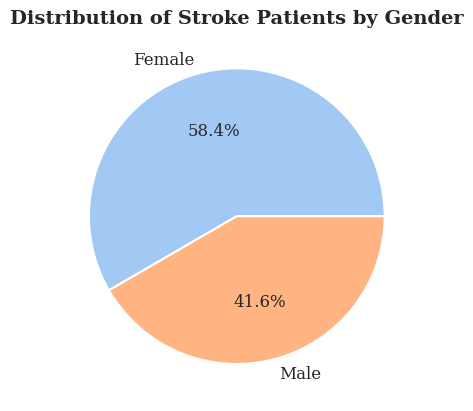

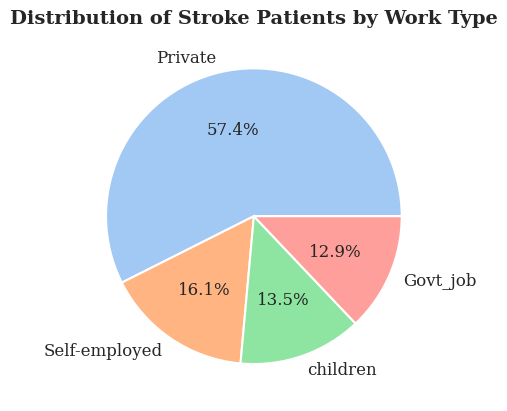

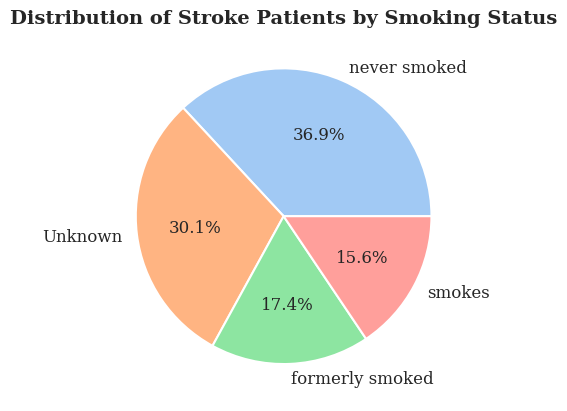

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define font parameters
font = {'family': 'serif', 'weight': 'normal', 'size': 12}

# Gender pie chart
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel')[0:2],
        textprops={'fontfamily': 'serif', 'fontsize': 12})
plt.title('Distribution of Stroke Patients by Gender', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

# Work type pie chart
work_counts = df['work_type'].value_counts()
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel')[0:4],
        textprops={'fontfamily': 'serif', 'fontsize': 12})
plt.title('Distribution of Stroke Patients by Work Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

# Smoking status pie chart
smoking_counts = df['smoking_status'].value_counts()
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel')[0:4],
        textprops={'fontfamily': 'serif', 'fontsize': 12})
plt.title('Distribution of Stroke Patients by Smoking Status', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()


<ipython-input-40-92a24fb381a3>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_num[i], color=color, palette='hls', multiple='stack', shrink=0.5)


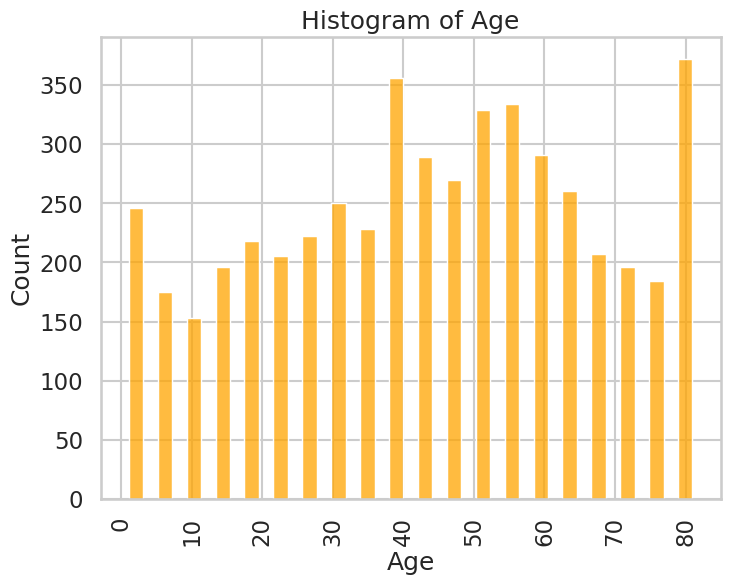

<ipython-input-40-92a24fb381a3>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_num[i], color=color, palette='hls', multiple='stack', shrink=0.5)


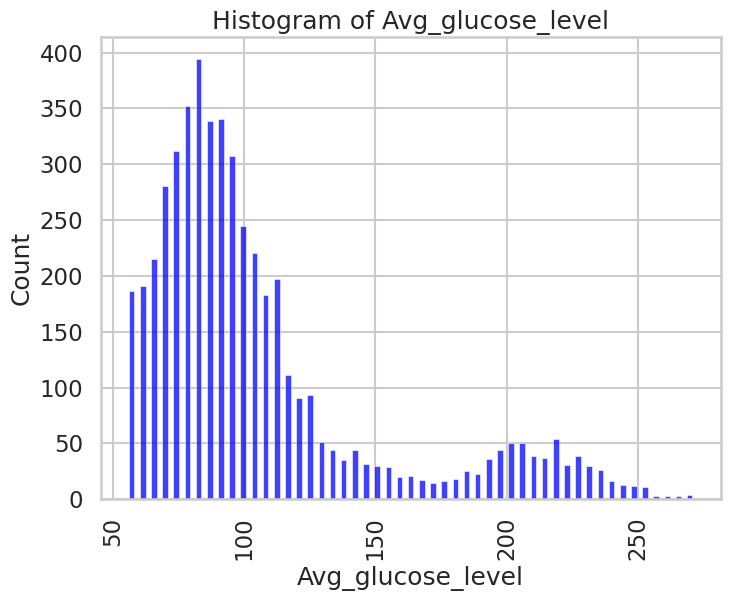

<ipython-input-40-92a24fb381a3>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_num[i], color=color, palette='hls', multiple='stack', shrink=0.5)


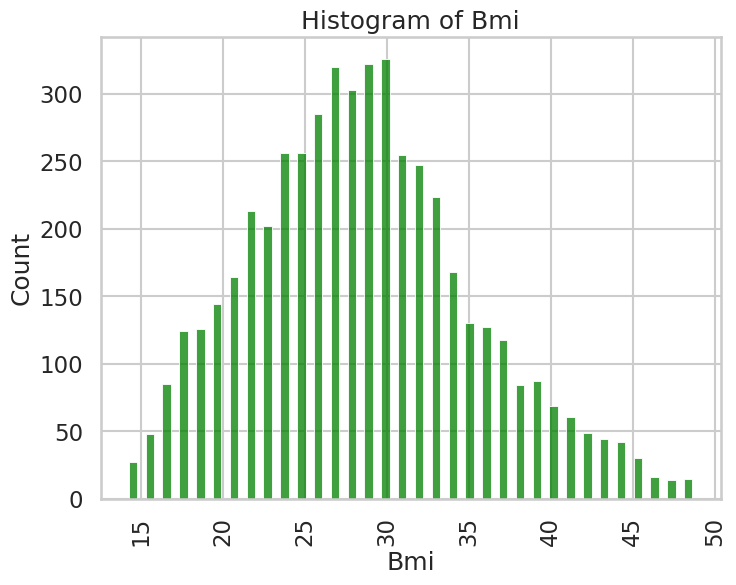

In [40]:
# Select numerical columns
df_num = df[['age', 'avg_glucose_level', 'bmi']]

# Define colors for each column
colors = ['orange', 'blue', 'green']

# Plot histograms for each column
for i, color in zip(df_num.columns, colors):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_num[i], color=color, palette='hls', multiple='stack', shrink=0.5)
    plt.title(f'Histogram of {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


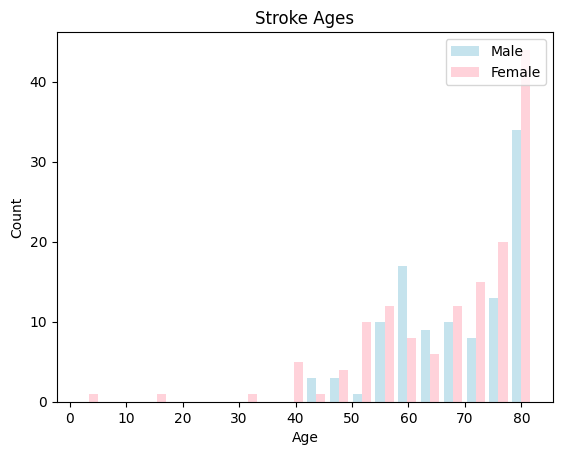

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# filter the stroke patients
stroke = df[df['stroke'] == 1]

# create two separate Series for male and female stroke patients' ages
male_age = stroke[stroke["gender"] == "Male"]["age"]
female_age = stroke[stroke["gender"] == "Female"]["age"]

# plot the histogram using the Series above
plt.hist([male_age, female_age], bins=20, color=["lightblue", "pink"], alpha=0.7, label=["Male", "Female"])
plt.legend(loc="upper right")
plt.title("Stroke Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#**STEP 1: Data Preprocessing** 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

#Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['bmi']] = imputer.fit_transform(df[['bmi']])

#Replace "Unknown" with mean or median in 'smoking_status' column
smoking_status_mode = df['smoking_status'].mode()[0]
df['smoking_status'].replace('Unknown', smoking_status_mode, inplace=True)

#Encode categorical variables
le = LabelEncoder()
ohe = OneHotEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = ohe.fit_transform(df[['work_type']]).toarray()
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

#Scale numerical features
scaler = StandardScaler()
df[['age', 'avg_glucose_level']] = scaler.fit_transform(df[['age', 'avg_glucose_level']])
mmscaler = MinMaxScaler()
df[['bmi']] = mmscaler.fit_transform(df[['bmi']])

# Split the dataset into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Balancing the data using smote
s=SMOTE()
X,y=s.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Number of samples after smote
len(y)
len(X)

9466

# **STEP 2 : Feature Selection(PCA)**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline for PCA and classification
pca = PCA()
rfc = RandomForestClassifier()
pipe = Pipeline([('pca', pca), ('rfc', rfc)])

# Define the hyperparameters to tune
param_grid = {'pca__n_components': np.arange(1, X.shape[1]+1)}

# Perform grid search cross-validation to find the best number of components
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X, y)

# Print the best number of components and the corresponding cross-validation score
print("Best number of components:", grid.best_params_['pca__n_components'])
print("Cross-validation score with best number of components:", grid.best_score_)


Best number of components: 10
Cross-validation score with best number of components: 0.9268960673765572


In [ ]:
# Fit PCA on the original feature matrix X
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

#**STEP 3:Training the model** 

# **Training the model Without PCA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Select the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()
knn = KNeighborsClassifier()

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)
mlp.fit(X_train, y_train)
xgb.fit(X_train,y_train)
ada.fit(X_train,y_train)
gb.fit(X_train,y_train)
nb.fit(X_train,y_train)
knn.fit(X_train,y_train)


# Make predictions using the best models
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
mlp_pred = mlp.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_pred = ada.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Evaluating the model without PCA**

**Accuracy Score** 

In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# print the accuracy score for each model
print("Accuracy Scores: ")
print("")
print('Decision Tree:', dt_acc)
print('Random Forest:', rf_acc)
print('Logistic Regression:', lr_acc)
print('Support Vector Machine:', svm_acc)
print('Multi-Layer Perceptron:', mlp_acc)
print('Gradient Boosting:', gb_acc)
print('XGBoost:',xgb_acc)
print('AdaBoost:',ada_acc)
print('K-Nearest Neighbors:',knn_acc)
print('Naive Bayes:',nb_acc)

Accuracy Scores: 

Decision Tree: 0.9234424498416051
Random Forest: 0.9287222808870116
Logistic Regression: 0.793558606124604
Support Vector Machine: 0.8426610348468849
Multi-Layer Perceptron: 0.8833157338965153
Gradient Boosting: 0.8579725448785639
XGBoost: 0.954065469904963
AdaBoost: 0.8236536430834214
K-Nearest Neighbors: 0.8970432946145723
Naive Bayes: 0.76610348468849


**Precision Score**

In [ ]:
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
lr_prec = precision_score(y_test, lr_pred)
svm_prec = precision_score(y_test, svm_pred)
mlp_prec = precision_score(y_test, mlp_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
ada_prec = precision_score(y_test, ada_pred)
knn_prec = precision_score(y_test, knn_pred)
nb_prec = precision_score(y_test, nb_pred)

# print the precision score for each model
print("Precision Scores: ")
print("")
print('Decision Tree:', dt_prec)
print('Random Forest:', rf_prec)
print('Logistic Regression:', lr_prec)
print('Support Vector Machine:', svm_prec)
print('Multi-Layer Perceptron:', mlp_prec)
print('Gradient Boosting:', gb_prec)
print('XGBoost:',xgb_prec)
print('AdaBoost:',ada_prec)
print('K-Nearest Neighbors:',knn_prec)
print('Naive Bayes:',nb_prec)

Precision Scores: 

Decision Tree: 0.926673751328374
Random Forest: 0.9101917255297679
Logistic Regression: 0.7706511175898931
Support Vector Machine: 0.800369685767098
Multi-Layer Perceptron: 0.8438978240302744
Gradient Boosting: 0.8267564966313763
XGBoost: 0.9704918032786886
AdaBoost: 0.789622641509434
K-Nearest Neighbors: 0.8419618528610354
Naive Bayes: 0.7522477522477522


 **Recall Score**

In [ ]:
dt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)
lr_rec = recall_score(y_test, lr_pred)
svm_rec = recall_score(y_test, svm_pred)
mlp_rec = recall_score(y_test, mlp_pred)
gb_rec = recall_score(y_test, gb_pred)
xgb_rec = recall_score(y_test, xgb_pred)
ada_rec = recall_score(y_test, ada_pred)
knn_rec = recall_score(y_test, knn_pred)
nb_rec = recall_score(y_test, nb_pred)

# print the recall score for each model
print("Recall Scores: ")
print("")
print('Decision Tree:', dt_rec)
print('Random Forest:', rf_rec)
print('Logistic Regression:', lr_rec)
print('Support Vector Machine:', svm_rec)
print('Multi-Layer Perceptron:', mlp_rec)
print('Gradient Boosting:', gb_rec)
print('XGBoost:',xgb_rec)
print('AdaBoost:',ada_rec)
print('K-Nearest Neighbors:',knn_rec)
print('Naive Bayes:',nb_rec)

Recall Scores: 

Decision Tree: 0.919831223628692
Random Forest: 0.9514767932489452
Logistic Regression: 0.8364978902953587
Support Vector Machine: 0.9135021097046413
Multi-Layer Perceptron: 0.9409282700421941
Gradient Boosting: 0.9061181434599156
XGBoost: 0.9367088607594937
AdaBoost: 0.8829113924050633
K-Nearest Neighbors: 0.9778481012658228
Naive Bayes: 0.7943037974683544


 **F1 Score**

In [ ]:
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)
svm_f1 = f1_score(y_test, svm_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
ada_f1 = f1_score(y_test, ada_pred)
knn_f1 = f1_score(y_test, knn_pred)
nb_f1 = f1_score(y_test, nb_pred)

# print the f1 score for each model
print("F1 Scores: ")
print("")
print('Decision Tree:', dt_f1)
print('Random Forest:', rf_f1)
print('Logistic Regression:', lr_f1)
print('Support Vector Machine:', svm_f1)
print('Multi-Layer Perceptron:', mlp_f1)
print('Gradient Boosting:', gb_f1)
print('XGBoost:',xgb_f1)
print('AdaBoost:',ada_f1)
print('K-Nearest Neighbors:',knn_f1)
print('Naive Bayes:',nb_f1)

F1 Scores: 

Decision Tree: 0.923239809422975
Random Forest: 0.9303764827230532
Logistic Regression: 0.8022255943348509
Support Vector Machine: 0.8532019704433498
Multi-Layer Perceptron: 0.8897755610972569
Gradient Boosting: 0.8646200301962758
XGBoost: 0.9533011272141707
AdaBoost: 0.8336653386454184
K-Nearest Neighbors: 0.9048316251830161
Naive Bayes: 0.7727039507439712


**ROC AUC Score**

In [ ]:
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]
svm_probs = svm.decision_function(X_test)
mlp_probs = mlp.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
ada_probs = ada.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
nb_probs = nb.predict_proba(X_test)[:, 1]

dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# print the roc auc score for each model
print("ROC AUC Scores: ")
print("")
print('Decision Tree:', dt_auc)
print('Random Forest:', rf_auc)
print('Logistic Regression:', lr_auc)
print('Support Vector Machine:', svm_auc)
print('Multi-Layer Perceptron:', mlp_auc)
print('Gradient Boosting:', gb_auc)
print('XGBoost:',xgb_auc)
print('AdaBoost:',ada_auc)
print('K-Nearest Neighbors:',knn_auc)
print('Naive Bayes:',nb_auc)

ROC AUC Scores: 

Decision Tree: 0.9234462672054664
Random Forest: 0.9853140248525882
Logistic Regression: 0.8567709030249506
Support Vector Machine: 0.9070180016235359
Multi-Layer Perceptron: 0.9386925629566195
Gradient Boosting: 0.9498354162763936
XGBoost: 0.9897302432627719
AdaBoost: 0.9090345982640655
K-Nearest Neighbors: 0.9569690502314877
Naive Bayes: 0.8377356134200409


**Cross Validation Score**

In [ ]:
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5)
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
xgb_scores=cross_val_score(xgb,X_train,y_train,cv=5)
ada_scores=cross_val_score(ada,X_train,y_train,cv=5)
knn_scores=cross_val_score(knn,X_train,y_train,cv=5)
nb_scores=cross_val_score(nb,X_train,y_train,cv=5)

# calculate average accuracy for each model

dt_avg_acc = np.mean(dt_scores)
rf_avg_acc = np.mean(rf_scores)
lr_avg_acc = np.mean(lr_scores)
svm_avg_acc = np.mean(svm_scores)
mlp_avg_acc = np.mean(mlp_scores)
gb_avg_acc = np.mean(gb_scores)
xgb_avg_acc = np.mean(xgb_scores)
ada_avg_acc = np.mean(ada_scores)
knn_avg_acc = np.mean(knn_scores)
nb_avg_acc = np.mean(nb_scores)

# print the average accuracy for each model
print("Average Accuracy Scores: ")
print("")
print('Decision Tree:', dt_avg_acc)
print('Random Forest:', rf_avg_acc)
print('Logistic Regression:', lr_avg_acc)
print('Support Vector Machine:', svm_avg_acc)
print('Multi-Layer Perceptron:', mlp_avg_acc)
print('Gradient Boosting:', gb_avg_acc)
print('XGBoost:',xgb_avg_acc)
print('AdaBoost:',ada_avg_acc)
print('K-Nearest Neighbors:',knn_avg_acc)
print('Naive Bayes:',nb_avg_acc)
print("")

# select the best model based on its accuracy
best_model = max(lr_avg_acc, dt_avg_acc, rf_avg_acc, gb_avg_acc, svm_avg_acc, mlp_avg_acc,xgb_avg_acc,ada_avg_acc,gb_avg_acc,nb_avg_acc,knn_avg_acc)

if best_model == lr_avg_acc:
    print("The best model is Logistic Regression")
elif best_model == dt_avg_acc:
    print("The best model is Decision Tree")
elif best_model == rf_avg_acc:
    print("The best model is Random Forest")
elif best_model == gb_avg_acc:
    print("The best model is Gradient Boosting")
elif best_model == svm_avg_acc:
    print("The best model is Support Vector Machine")
elif best_model == mlp_avg_acc:
    print("The best model is Multi-Layer Perceptron")
elif best_model == xgb_avg_acc:
    print("The best model is XGBoost")
elif best_model == ada_avg_acc:
    print("The best model is AdaBoost")
elif best_model == gb_avg_acc:
    print("The best model is Gradient Boosting")
elif best_model == nb_avg_acc:
    print("The best model is Naive Bayes")
else:
    print("The best model is K-Nearest Neighbors")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Average Accuracy Scores: 

Decision Tree: 0.9051768532203287
Random Forest: 0.9237971670350655
Logistic Regression: 0.7863155324779505
Support Vector Machine: 0.8333304558989584
Multi-Layer Perceptron: 0.8650257443181569
Gradient Boosting: 0.8663466610861879
XGBoost: 0.9580020142040624
AdaBoost: 0.8244820836112673
K-Nearest Neighbors: 0.886423654254461
Naive Bayes: 0.7634673956167083

The best model is XGBoost


# **STEP-3: Training the model**

## **Training the model with PCA**

In [ ]:
# Select the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()
knn = KNeighborsClassifier()

# Train the models on pca dataset
lr.fit(X_pca_train, y_train)
dt.fit(X_pca_train, y_train)
rf.fit(X_pca_train, y_train)
gb.fit(X_pca_train, y_train)
svm.fit(X_pca_train, y_train)
mlp.fit(X_pca_train, y_train)
xgb.fit(X_pca_train,y_train)
ada.fit(X_pca_train,y_train)
gb.fit(X_pca_train,y_train)
nb.fit(X_pca_train,y_train)
knn.fit(X_pca_train,y_train)

# Make predictions using the best models
dt_pred = dt.predict(X_pca_test)
rf_pred = rf.predict(X_pca_test)
lr_pred = lr.predict(X_pca_test)
svm_pred = svm.predict(X_pca_test)
mlp_pred = mlp.predict(X_pca_test)
gb_pred = gb.predict(X_pca_test)
xgb_pred = xgb.predict(X_pca_test)
ada_pred = ada.predict(X_pca_test)
knn_pred = knn.predict(X_pca_test)
nb_pred = nb.predict(X_pca_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **Evaluating the model with PCA**

### **Accuracy Score**

In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# print the accuracy score for each model
print("Accuracy Scores: ")
print("")
print('Decision Tree:', dt_acc)
print('Random Forest:', rf_acc)
print('Logistic Regression:', lr_acc)
print('Support Vector Machine:', svm_acc)
print('Multi-Layer Perceptron:', mlp_acc)
print('Gradient Boosting:', gb_acc)
print('XGBoost:',xgb_acc)
print('AdaBoost:',ada_acc)
print('K-Nearest Neighbors:',knn_acc)
print('Naive Bayes:',nb_acc)

Accuracy Scores: 

Decision Tree: 0.9007391763463569
Random Forest: 0.928194297782471
Logistic Regression: 0.793558606124604
Support Vector Machine: 0.8431890179514255
Multi-Layer Perceptron: 0.8790918690601901
Gradient Boosting: 0.8357972544878564
XGBoost: 0.9060190073917634
AdaBoost: 0.8020063357972544
K-Nearest Neighbors: 0.8970432946145723
Naive Bayes: 0.776663146779303


### **Precision Score**

In [ ]:
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
lr_prec = precision_score(y_test, lr_pred)
svm_prec = precision_score(y_test, svm_pred)
mlp_prec = precision_score(y_test, mlp_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
ada_prec = precision_score(y_test, ada_pred)
knn_prec = precision_score(y_test, knn_pred)
nb_prec = precision_score(y_test, nb_pred)

# print the precision score for each model
print("Precision Scores: ")
print("")
print('Decision Tree:', dt_prec)
print('Random Forest:', rf_prec)
print('Logistic Regression:', lr_prec)
print('Support Vector Machine:', svm_prec)
print('Multi-Layer Perceptron:', mlp_prec)
print('Gradient Boosting:', gb_prec)
print('XGBoost:',xgb_prec)
print('AdaBoost:',ada_prec)
print('K-Nearest Neighbors:',knn_prec)
print('Naive Bayes:',nb_prec)

Precision Scores: 

Decision Tree: 0.889344262295082
Random Forest: 0.8980392156862745
Logistic Regression: 0.7706511175898931
Support Vector Machine: 0.8011100832562442
Multi-Layer Perceptron: 0.8420551855375833
Gradient Boosting: 0.7979420018709074
XGBoost: 0.8701923076923077
AdaBoost: 0.7741626794258373
K-Nearest Neighbors: 0.8419618528610354
Naive Bayes: 0.7894156560088202


### **Recall Score**

In [ ]:
dt_rec_p = recall_score(y_test, dt_pred)
rf_rec_p = recall_score(y_test, rf_pred)
lr_rec_p = recall_score(y_test, lr_pred)
svm_rec_p = recall_score(y_test, svm_pred)
mlp_rec_p = recall_score(y_test, mlp_pred)
gb_rec_p = recall_score(y_test, gb_pred)
xgb_rec_p = recall_score(y_test, xgb_pred)
ada_rec_p = recall_score(y_test, ada_pred)
knn_rec_p = recall_score(y_test, knn_pred)
nb_rec_p = recall_score(y_test, nb_pred)

# print the recall score for each model
print("Recall Scores: ")
print("")
print('Decision Tree:', dt_rec_p)
print('Random Forest:', rf_rec_p)
print('Logistic Regression:', lr_rec_p)
print('Support Vector Machine:', svm_rec_p)
print('Multi-Layer Perceptron:', mlp_rec_p)
print('Gradient Boosting:', gb_rec_p)
print('XGBoost:',xgb_rec_p)
print('AdaBoost:',ada_rec_p)
print('K-Nearest Neighbors:',knn_rec_p)
print('Naive Bayes:',nb_rec_p)

Recall Scores: 

Decision Tree: 0.9156118143459916
Random Forest: 0.9662447257383966
Logistic Regression: 0.8364978902953587
Support Vector Machine: 0.9135021097046413
Multi-Layer Perceptron: 0.9335443037974683
Gradient Boosting: 0.8997890295358649
XGBoost: 0.9546413502109705
AdaBoost: 0.8533755274261603
K-Nearest Neighbors: 0.9778481012658228
Naive Bayes: 0.7552742616033755


### **F1 Score**

In [ ]:
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)
svm_f1 = f1_score(y_test, svm_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
ada_f1 = f1_score(y_test, ada_pred)
knn_f1 = f1_score(y_test, knn_pred)
nb_f1 = f1_score(y_test, nb_pred)

# print the f1 score for each model
print("F1 Scores: ")
print("")
print('Decision Tree:', dt_f1)
print('Random Forest:', rf_f1)
print('Logistic Regression:', lr_f1)
print('Support Vector Machine:', svm_f1)
print('Multi-Layer Perceptron:', mlp_f1)
print('Gradient Boosting:', gb_f1)
print('XGBoost:',xgb_f1)
print('AdaBoost:',ada_f1)
print('K-Nearest Neighbors:',knn_f1)
print('Naive Bayes:',nb_f1)

F1 Scores: 

Decision Tree: 0.9022869022869022
Random Forest: 0.9308943089430894
Logistic Regression: 0.8022255943348509
Support Vector Machine: 0.8536224741251848
Multi-Layer Perceptron: 0.8854427213606803
Gradient Boosting: 0.8458106098165592
XGBoost: 0.9104627766599598
AdaBoost: 0.8118414450577018
K-Nearest Neighbors: 0.9048316251830161
Naive Bayes: 0.7719676549865229


### **ROC AUC Score**

In [ ]:
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]
svm_probs = svm.decision_function(X_test)
mlp_probs = mlp.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
ada_probs = ada.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
nb_probs = nb.predict_proba(X_test)[:, 1]

dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# print the roc auc score for each model
print("ROC AUC Scores: ")
print("")
print('Decision Tree:', dt_auc)
print('Random Forest:', rf_auc)
print('Logistic Regression:', lr_auc)
print('Support Vector Machine:', svm_auc)
print('Multi-Layer Perceptron:', mlp_auc)
print('Gradient Boosting:', gb_auc)
print('XGBoost:',xgb_auc)
print('AdaBoost:',ada_auc)
print('K-Nearest Neighbors:',knn_auc)
print('Naive Bayes:',nb_auc)

ROC AUC Scores: 

Decision Tree: 0.4819303574455178
Random Forest: 0.3796609753704248
Logistic Regression: 0.3586966217964157
Support Vector Machine: 0.33111100703829577
Multi-Layer Perceptron: 0.33951079829796343
Gradient Boosting: 0.3097530352093202
XGBoost: 0.3359732517997163
AdaBoost: 0.32506511984728054
K-Nearest Neighbors: 0.4369987778877976
Naive Bayes: 0.4295178009116779


### **Cross Validation Score**

In [ ]:
dt_scores_p = cross_val_score(dt, X_pca_train, y_train, cv=5)
rf_scores_p = cross_val_score(rf, X_pca_train, y_train, cv=5)
lr_scores_p = cross_val_score(lr, X_pca_train, y_train, cv=5)
svm_scores_p = cross_val_score(svm, X_pca_train, y_train, cv=5)
mlp_scores_p = cross_val_score(mlp, X_pca_train, y_train, cv=5)
gb_scores_p=cross_val_score(gb,X_pca_train,y_train,cv=5)
xgb_scores_p=cross_val_score(xgb,X_pca_train,y_train,cv=5)
ada_scores_p=cross_val_score(ada,X_pca_train,y_train,cv=5)
knn_scores_p=cross_val_score(knn,X_pca_train,y_train,cv=5)
nb_scores_p=cross_val_score(nb,X_pca_train,y_train,cv=5)


# print the average accuracy of each model after pca
lr_avg_acc_p = np.mean(lr_scores_p)
dt_avg_acc_p = np.mean(dt_scores_p)
rf_avg_acc_p = np.mean(rf_scores_p)
gb_avg_acc_p = np.mean(gb_scores_p)
svm_avg_acc_p = np.mean(svm_scores_p)
mlp_avg_acc_p = np.mean(mlp_scores_p)
xgb_avg_acc_p = np.mean(xgb_scores_p)
ada_avg_acc_p = np.mean(ada_scores_p)
nb_avg_acc_p = np.mean(nb_scores_p)
knn_avg_acc_p = np.mean(knn_scores_p)

# print the average accuracy for each model after PCA
print(" ")
print(" ")
print("Average Accuracy Scores after PCA: ")
print(" ")
print(" ")
print('Logistic Regression:', lr_avg_acc_p)
print('Decision Tree:', dt_avg_acc_p)
print('Random Forest:', rf_avg_acc_p)
print('Gradient Boosting:', gb_avg_acc_p)
print('Support Vector Machine:', svm_avg_acc_p)
print('Multi-Layer Perceptron:', mlp_avg_acc_p)
print('XGBoost:',xgb_avg_acc_p)
print('AdaBoost:',ada_avg_acc_p)
print('Gradient Boosting:',gb_avg_acc_p)
print('Naive Bayes:',nb_avg_acc_p)
print('K-Nearest Neighbors:',knn_avg_acc_p)


# select the best model based on its accuracy
best_model = max(lr_avg_acc_p, dt_avg_acc_p, rf_avg_acc_p, gb_avg_acc_p, svm_avg_acc_p, mlp_avg_acc_p,xgb_avg_acc_p,ada_avg_acc_p,gb_avg_acc_p,nb_avg_acc_p,knn_avg_acc_p)

if best_model == lr_avg_acc_p:
    print("The best model is Logistic Regression")
elif best_model == dt_avg_acc_p:
    print("The best model is Decision Tree")
elif best_model == rf_avg_acc_p:
    print("The best model is Random Forest")
elif best_model == gb_avg_acc_p:
    print("The best model is Gradient Boosting")
elif best_model == svm_avg_acc_p:
    print("The best model is Support Vector Machine")
elif best_model == mlp_avg_acc_p:
    print("The best model is Multi-Layer Perceptron")
elif best_model == xgb_avg_acc_p:
    print("The best model is XGBoost")
elif best_model == ada_avg_acc_p:
    print("The best model is AdaBoost")
elif best_model == gb_avg_acc_p:
    print("The best model is Gradient Boosting")
elif best_model == nb_avg_acc_p:
    print("The best model is Naive Bayes")
else:
    print("The best model is K-Nearest Neighbors")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

 
 
Average Accuracy Scores after PCA: 
 
 
Logistic Regression: 0.7863155324779505
Decision Tree: 0.8707086772085398
Random Forest: 0.9182508686799988
Gradient Boosting: 0.8334638642199754
Support Vector Machine: 0.8337264955029188
Multi-Layer Perceptron: 0.867933173766518
XGBoost: 0.9042519760562581
AdaBoost: 0.8024278570525482
Gradient Boosting: 0.8334638642199754
Naive Bayes: 0.7702048646079932
K-Nearest Neighbors: 0.886423654254461
The best model is Random Forest


# **Comparing the preprocessed dataset  with and without PCA by visualizations**

<ipython-input-217-9ce179e86a1a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(models, rotation=90)
<ipython-input-217-9ce179e86a1a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(models, rotation=90)


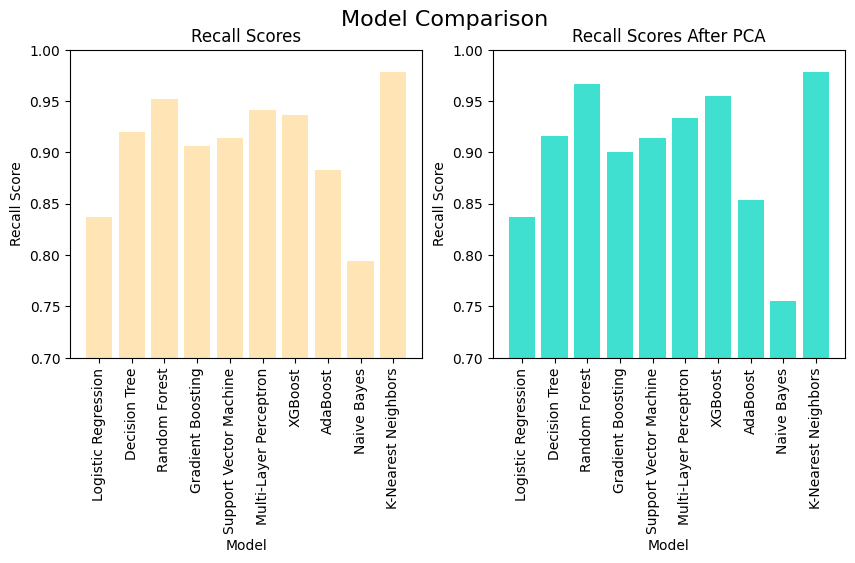

In [ ]:
import matplotlib.pyplot as plt

# create figure and axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# plot recall scores for each model on first axis
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", 
          "Support Vector Machine", "Multi-Layer Perceptron", "XGBoost", "AdaBoost", 
          "Naive Bayes", "K-Nearest Neighbors"]
scores = [lr_rec, dt_rec, rf_rec, gb_rec,
          svm_rec, mlp_rec, xgb_rec, ada_rec,
          nb_rec, knn_rec]

ax1.bar(models, scores, color='moccasin')
ax1.set_xticklabels(models, rotation=90)
ax1.set_title("Recall Scores")
ax1.set_xlabel("Model")
ax1.set_ylabel("Recall Score")
ax1.set_ylim(0.7, 1.0)  # set y-axis limits

# plot recall scores for each model after PCA on second axis
pca_scores = [lr_rec_p, dt_rec_p, rf_rec_p, gb_rec_p,
              svm_rec_p, mlp_rec_p, xgb_rec_p, ada_rec_p,
              nb_rec_p, knn_rec_p]
ax2.bar(models, pca_scores, color='turquoise')
ax2.set_xticklabels(models, rotation=90)
ax2.set_title("Recall Scores After PCA")
ax2.set_xlabel("Model")
ax2.set_ylabel("Recall Score")
ax2.set_ylim(0.7, 1.0)  # set y-axis limits

# set overall title
fig.suptitle("Model Comparison", fontsize=16)

# display the plot
plt.show()


<ipython-input-218-23d86b8b0694>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(models, rotation=90)
<ipython-input-218-23d86b8b0694>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(models, rotation=90)


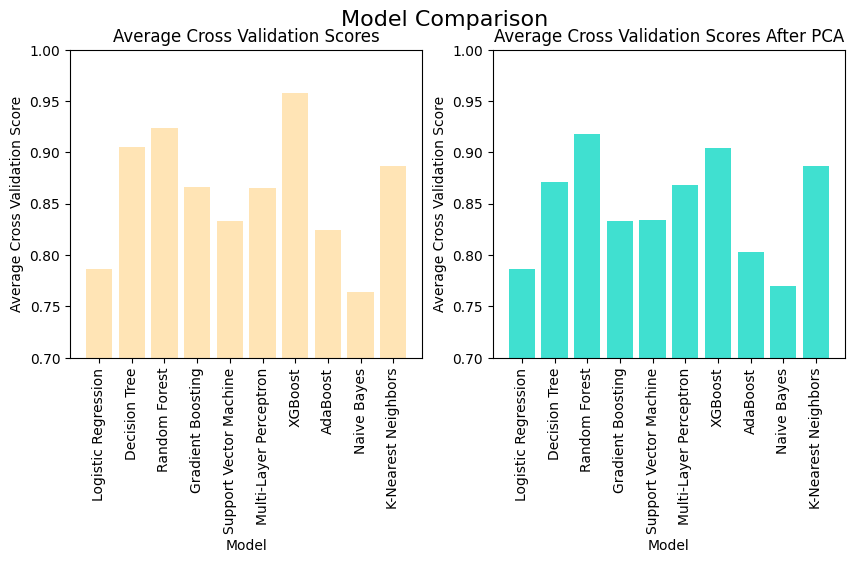

In [ ]:
import matplotlib.pyplot as plt

# create figure and axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# plot cross validation scores for each model on first axis
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", 
          "Support Vector Machine", "Multi-Layer Perceptron", "XGBoost", "AdaBoost", 
          "Naive Bayes", "K-Nearest Neighbors"]
scores = [lr_scores.mean(), dt_scores.mean(), rf_scores.mean(), gb_scores.mean(),
          svm_scores.mean(), mlp_scores.mean(), xgb_scores.mean(), ada_scores.mean(),
          nb_scores.mean(), knn_scores.mean()]

ax1.bar(models, scores, color='moccasin')
ax1.set_xticklabels(models, rotation=90)
ax1.set_title("Average Cross Validation Scores")
ax1.set_xlabel("Model")
ax1.set_ylabel("Average Cross Validation Score")
ax1.set_ylim(0.7, 1.0)  # set y-axis limits

# plot cross validation scores for each model after PCA on second axis
pca_scores = [lr_scores_p.mean(), dt_scores_p.mean(), rf_scores_p.mean(), gb_scores_p.mean(),
              svm_scores_p.mean(), mlp_scores_p.mean(), xgb_scores_p.mean(), ada_scores_p.mean(),
              nb_scores_p.mean(), knn_scores_p.mean()]
ax2.bar(models, pca_scores, color='turquoise')
ax2.set_xticklabels(models, rotation=90)
ax2.set_title("Average Cross Validation Scores After PCA")
ax2.set_xlabel("Model")
ax2.set_ylabel("Average Cross Validation Score")
ax2.set_ylim(0.7, 1.0)  # set y-axis limits

# set overall title
fig.suptitle("Model Comparison", fontsize=16)

# display the plot
plt.show()


# **STEP 4: Hyper Parameter tuning**

## **Training the model without PCA**

In [ ]:
# Select the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()
knn = KNeighborsClassifier()

# Define the hyperparameters to search
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
lr_params = {'C': [0.1, 1, 10]}
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
mlp_params = {'hidden_layer_sizes': [(100,), (50,50), (20,20,20)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01]}
gb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 1]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 1]}
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']}
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, None]}

# Perform grid search for each model
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='recall')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='recall')
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='recall')
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='recall')
mlp_grid = RandomizedSearchCV(mlp, mlp_params, cv=5, scoring='recall', n_iter=10)
gb_rand = RandomizedSearchCV(gb, gb_params, cv=5, scoring='recall')
xgb_rand = RandomizedSearchCV(xgb, xgb_params, cv=5, scoring='recall')
ada_rand = RandomizedSearchCV(ada, ada_params, cv=5, scoring='recall')
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='recall')
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='recall')


# Fit the models with the best hyperparameters
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
mlp_grid.fit(X_train, y_train)
gb_rand.fit(X_train, y_train)
xgb_rand.fit(X_train, y_train)
ada_rand.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)


dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
lr_best = lr_grid.best_estimator_
svm_best = svm_grid.best_estimator_
mlp_best = mlp_grid.best_estimator_
gb_best = gb_rand.best_estimator_
xgb_best = xgb_rand.best_estimator_
ada_best = ada_rand.best_estimator_
knn_best = knn_grid.best_estimator_
nb_best = nb_grid.best_estimator_

# Make predictions using the best models
dt_pred = dt_best.predict(X_test)
rf_pred = rf_best.predict(X_test)
lr_pred = lr_best.predict(X_test)
svm_pred = svm_best.predict(X_test)
mlp_pred = mlp_best.predict(X_test)
gb_pred = gb_best.predict(X_test)
xgb_pred = xgb_best.predict(X_test)
ada_pred = ada_best.predict(X_test)
knn_pred = knn_best.predict(X_test)
nb_pred = nb_best.predict(X_test)


## **Evaulating the model witout PCA**

### **Accuracy Score**

In [ ]:
# Evaluate the best models
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# print the accuracy score for each model
print("Accuracy Scores: ")
print("")
print('Decision Tree:', dt_acc)
print('Random Forest:', rf_acc)
print('Logistic Regression:', lr_acc)
print('Support Vector Machine:', svm_acc)
print('Multi-Layer Perceptron:', mlp_acc)
print('Gradient Boosting:', gb_acc)
print('XGBoost:',xgb_acc)
print('AdaBoost:',ada_acc)
print('K-Nearest Neighbors:',knn_acc)
print('Naive Bayes:',nb_acc)

Accuracy Scores: 

Decision Tree: 0.8400211193241817
Random Forest: 0.925026399155227
Logistic Regression: 0.7956705385427666
Support Vector Machine: 0.9287222808870116
Multi-Layer Perceptron: 0.9123548046462513
Gradient Boosting: 0.9498416050686378
XGBoost: 0.941921858500528
AdaBoost: 0.795142555438226
K-Nearest Neighbors: 0.8901795142555439
Naive Bayes: 0.7666314677930306


### **Precision Score**

In [ ]:
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
lr_prec = precision_score(y_test, lr_pred)
svm_prec = precision_score(y_test, svm_pred)
mlp_prec = precision_score(y_test, mlp_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
ada_prec = precision_score(y_test, ada_pred)
knn_prec = precision_score(y_test, knn_pred)
nb_prec = precision_score(y_test, nb_pred)

# print the precision score for each model
print("Precision Scores: ")
print("")
print('Decision Tree:', dt_prec)
print('Random Forest:', rf_prec)
print('Logistic Regression:', lr_prec)
print('Support Vector Machine:', svm_prec)
print('Multi-Layer Perceptron:', mlp_prec)
print('Gradient Boosting:', gb_prec)
print('XGBoost:',xgb_prec)
print('AdaBoost:',ada_prec)
print('K-Nearest Neighbors:',knn_prec)
print('Naive Bayes:',nb_prec)

Precision Scores: 

Decision Tree: 0.7950594693504117
Random Forest: 0.8998015873015873
Logistic Regression: 0.771539206195547
Support Vector Machine: 0.8904899135446686
Multi-Layer Perceptron: 0.8766859344894027
Gradient Boosting: 0.958109559613319
XGBoost: 0.9419831223628692
AdaBoost: 0.7389078498293515
K-Nearest Neighbors: 0.8280141843971631
Naive Bayes: 0.7514910536779325


### **Recall Score**

In [ ]:
# Print the evaluation resultsdt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)
lr_rec = recall_score(y_test, lr_pred)
svm_rec = recall_score(y_test, svm_pred)
mlp_rec = recall_score(y_test, mlp_pred)
gb_rec = recall_score(y_test, gb_pred)
xgb_rec = recall_score(y_test, xgb_pred)
ada_rec = recall_score(y_test, ada_pred)
knn_rec = recall_score(y_test, knn_pred)
nb_rec = recall_score(y_test, nb_pred)

# print the recall score for each model
print("Recall Scores: ")
print("")
print('Decision Tree:', dt_rec)
print('Random Forest:', rf_rec)
print('Logistic Regression:', lr_rec)
print('Support Vector Machine:', svm_rec)
print('Multi-Layer Perceptron:', mlp_rec)
print('Gradient Boosting:', gb_rec)
print('XGBoost:',xgb_rec)
print('AdaBoost:',ada_rec)
print('K-Nearest Neighbors:',knn_rec)
print('Naive Bayes:',nb_rec)

Recall Scores: 

Decision Tree: 0.919831223628692
Random Forest: 0.9567510548523207
Logistic Regression: 0.8407172995780591
Support Vector Machine: 0.9778481012658228
Multi-Layer Perceptron: 0.959915611814346
Gradient Boosting: 0.9409282700421941
XGBoost: 0.9419831223628692
AdaBoost: 0.9135021097046413
K-Nearest Neighbors: 0.9852320675105485
Naive Bayes: 0.7974683544303798


### **F1 Score**

In [ ]:
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)
svm_f1 = f1_score(y_test, svm_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
ada_f1 = f1_score(y_test, ada_pred)
knn_f1 = f1_score(y_test, knn_pred)
nb_f1 = f1_score(y_test, nb_pred)

# print the f1 score for each model
print("F1 Scores: ")
print("")
print('Decision Tree:', dt_f1)
print('Random Forest:', rf_f1)
print('Logistic Regression:', lr_f1)
print('Support Vector Machine:', svm_f1)
print('Multi-Layer Perceptron:', mlp_f1)
print('Gradient Boosting:', gb_f1)
print('XGBoost:',xgb_f1)
print('AdaBoost:',ada_f1)
print('K-Nearest Neighbors:',knn_f1)
print('Naive Bayes:',nb_f1)

F1 Scores: 

Decision Tree: 0.8515433610975012
Random Forest: 0.9274028629856852
Logistic Regression: 0.8046441191317516
Support Vector Machine: 0.9321266968325792
Multi-Layer Perceptron: 0.9164149043303121
Gradient Boosting: 0.94944119212347
XGBoost: 0.9419831223628692
AdaBoost: 0.8169811320754717
K-Nearest Neighbors: 0.8998073217726397
Naive Bayes: 0.7737973387922211


### **ROC AUC Score**

In [ ]:
dt_probs = dt_best.predict_proba(X_test)[:, 1]
rf_probs = rf_best.predict_proba(X_test)[:, 1]
lr_probs = lr_best.predict_proba(X_test)[:, 1]
svm_probs = svm_best.decision_function(X_test)
mlp_probs = mlp_best.predict_proba(X_test)[:, 1]
gb_probs = gb_best.predict_proba(X_test)[:, 1]
xgb_probs = xgb_best.predict_proba(X_test)[:, 1]
ada_probs = ada_best.predict_proba(X_test)[:, 1]
knn_probs = knn_best.predict_proba(X_test)[:, 1]
nb_probs = nb_best.predict_proba(X_test)[:, 1]

dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# print the roc auc score for each model
print("ROC AUC Scores: ")
print("")
print('Decision Tree:', dt_auc)
print('Random Forest:', rf_auc)
print('Logistic Regression:', lr_auc)
print('Support Vector Machine:', svm_auc)
print('Multi-Layer Perceptron:', mlp_auc)
print('Gradient Boosting:', gb_auc)
print('XGBoost:',xgb_auc)
print('AdaBoost:',ada_auc)
print('K-Nearest Neighbors:',knn_auc)
print('Naive Bayes:',nb_auc)

ROC AUC Scores: 

Decision Tree: 0.8995515205038314
Random Forest: 0.9843327668798674
Logistic Regression: 0.8571912828609914
Support Vector Machine: 0.9614711287142844
Multi-Layer Perceptron: 0.9632095164182299
Gradient Boosting: 0.9898333868564955
XGBoost: 0.9895167081471173
AdaBoost: 0.8176844988001891
K-Nearest Neighbors: 0.9628794569183146
Naive Bayes: 0.8375516275501557


## **Training the model With PCA**

In [ ]:
# Select the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()
knn = KNeighborsClassifier()

# Define the hyperparameters to search
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
lr_params = {'C': [0.1, 1, 10]}
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
mlp_params = {'hidden_layer_sizes': [(100,), (50,50), (20,20,20)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01]}
gb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 1]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 1]}
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']}
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, None]}

# Perform grid search for each model
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='recall')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='recall')
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='recall')
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='recall')
mlp_grid = RandomizedSearchCV(mlp, mlp_params, cv=5, scoring='recall', n_iter=10)
gb_rand = RandomizedSearchCV(gb, gb_params, cv=5, scoring='recall')
xgb_rand = RandomizedSearchCV(xgb, xgb_params, cv=5, scoring='recall')
ada_rand = RandomizedSearchCV(ada, ada_params, cv=5, scoring='recall')
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='recall')
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='recall')


# Fit the models with the best hyperparameters
dt_grid.fit(X_pca_train, y_train)
rf_grid.fit(X_pca_train, y_train)
lr_grid.fit(X_pca_train, y_train)
svm_grid.fit(X_pca_train, y_train)
mlp_grid.fit(X_pca_train, y_train)
gb_rand.fit(X_pca_train, y_train)
xgb_rand.fit(X_pca_train, y_train)
ada_rand.fit(X_pca_train, y_train)
knn_grid.fit(X_pca_train, y_train)
nb_grid.fit(X_pca_train, y_train)



dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
lr_best = lr_grid.best_estimator_
svm_best = svm_grid.best_estimator_
mlp_best = mlp_grid.best_estimator_
gb_best = gb_rand.best_estimator_
xgb_best = xgb_rand.best_estimator_
ada_best = ada_rand.best_estimator_
knn_best = knn_grid.best_estimator_
nb_best = nb_grid.best_estimator_

# Make predictions using the best models
dt_pred = dt_best.predict(X_pca_test)
rf_pred = rf_best.predict(X_pca_test)
lr_pred = lr_best.predict(X_pca_test)
svm_pred = svm_best.predict(X_pca_test)
mlp_pred = mlp_best.predict(X_pca_test)
gb_pred = gb_best.predict(X_pca_test)
xgb_pred = xgb_best.predict(X_pca_test)
ada_pred = ada_best.predict(X_pca_test)
knn_pred = knn_best.predict(X_pca_test)
nb_pred = nb_best.predict(X_pca_test)

# Evaluate the best models
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)



dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
lr_prec = precision_score(y_test, lr_pred)
svm_prec = precision_score(y_test, svm_pred)
mlp_prec = precision_score(y_test, mlp_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
ada_prec = precision_score(y_test, ada_pred)
knn_prec = precision_score(y_test, knn_pred)
nb_prec = precision_score(y_test, nb_pred)


# Print the evaluation resultsdt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)
lr_rec = recall_score(y_test, lr_pred)
svm_rec = recall_score(y_test, svm_pred)
mlp_rec = recall_score(y_test, mlp_pred)
gb_rec = recall_score(y_test, gb_pred)
xgb_rec = recall_score(y_test, xgb_pred)
ada_rec = recall_score(y_test, ada_pred)
knn_rec = recall_score(y_test, knn_pred)
nb_rec = recall_score(y_test, nb_pred)


dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)
svm_f1 = f1_score(y_test, svm_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
ada_f1 = f1_score(y_test, ada_pred)
knn_f1 = f1_score(y_test, knn_pred)
nb_f1 = f1_score(y_test, nb_pred)


dt_probs = dt_best.predict_proba(X_pca_test)[:, 1]
rf_probs = rf_best.predict_proba(X_pca_test)[:, 1]
lr_probs = lr_best.predict_proba(X_pca_test)[:, 1]
svm_probs = svm_best.decision_function(X_pca_test)
mlp_probs = mlp_best.predict_proba(X_pca_test)[:, 1]
gb_probs = gb_best.predict_proba(X_pca_test)[:, 1]
xgb_probs = xgb_best.predict_proba(X_pca_test)[:, 1]
ada_probs = ada_best.predict_proba(X_pca_test)[:, 1]
knn_probs = knn_best.predict_proba(X_pca_test)[:, 1]
nb_probs = nb_best.predict_proba(X_pca_test)[:, 1]


dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Decision Tree: Accuracy = 0.8706, Precision = 0.8119, Recall = 0.9198, F1-score = 0.8819, AUC = 0.8913
Random Forest: Accuracy = 0.9287, Precision = 0.8928, Recall = 0.9747, F1-score = 0.9319, AUC = 0.9770
Logistic Regression: Accuracy = 0.7957, Precision = 0.7715, Recall = 0.8407, F1-score = 0.8046, AUC = 0.8572
Support Vector Machine: Accuracy = 0.9287, Precision = 0.8905, Recall = 0.9778, F1-score = 0.9321, AUC = 0.9615
Multilayer Perceptron: Accuracy = 0.9192, Precision = 0.8886, Recall = 0.9589, F1-score = 0.9224, AUC = 0.9657
Gradient Boosting: Accuracy = 0.8939, Precision = 0.8462, Recall = 0.9631, F1-score = 0.9008, AUC = 0.9584
XGBoost: Accuracy = 0.8976, Precision = 0.8446, Recall = 0.9747, F1-score = 0.9050, AUC = 0.9557
AdaBoost: Accuracy = 0.7022, Precision = 0.6401, Recall = 0.9251, F1-score = 0.7567, AUC = 0.7743
KNN: Accuracy = 0.8902, Precision = 0.8280, Recall = 0.9852, F1-score = 0.8998, AUC = 0.9629
Naive Bayes: Accuracy = 0.7767, Precision = 0.7894, Recall = 0.7553

## **Evaluating the Models with PCA**

### **Accuracy Score**

In [ ]:
# Evaluate the best models
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# print the accuracy score for each model
print("Accuracy Scores: ")
print("")
print('Decision Tree:', dt_acc)
print('Random Forest:', rf_acc)
print('Logistic Regression:', lr_acc)
print('Support Vector Machine:', svm_acc)
print('Multi-Layer Perceptron:', mlp_acc)
print('Gradient Boosting:', gb_acc)
print('XGBoost:',xgb_acc)
print('AdaBoost:',ada_acc)
print('K-Nearest Neighbors:',knn_acc)
print('Naive Bayes:',nb_acc)

Accuracy Scores: 

Decision Tree: 0.8706441393875396
Random Forest: 0.9287222808870116
Logistic Regression: 0.7956705385427666
Support Vector Machine: 0.9287222808870116
Multi-Layer Perceptron: 0.9192185850052799
Gradient Boosting: 0.8938753959873285
XGBoost: 0.8975712777191129
AdaBoost: 0.7022175290390708
K-Nearest Neighbors: 0.8901795142555439
Naive Bayes: 0.776663146779303


 Recall Score

In [ ]:
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
lr_prec = precision_score(y_test, lr_pred)
svm_prec = precision_score(y_test, svm_pred)
mlp_prec = precision_score(y_test, mlp_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
ada_prec = precision_score(y_test, ada_pred)
knn_prec = precision_score(y_test, knn_pred)
nb_prec = precision_score(y_test, nb_pred)

# print the precision score for each model
print("Precision Scores: ")
print("")
print('Decision Tree:', dt_prec)
print('Random Forest:', rf_prec)
print('Logistic Regression:', lr_prec)
print('Support Vector Machine:', svm_prec)
print('Multi-Layer Perceptron:', mlp_prec)
print('Gradient Boosting:', gb_prec)
print('XGBoost:',xgb_prec)
print('AdaBoost:',ada_prec)
print('K-Nearest Neighbors:',knn_prec)
print('Naive Bayes:',nb_prec)

Precision Scores: 

Decision Tree: 0.8118899733806566
Random Forest: 0.8927536231884058
Logistic Regression: 0.771539206195547
Support Vector Machine: 0.8904899135446686
Multi-Layer Perceptron: 0.8885630498533724
Gradient Boosting: 0.8461538461538461
XGBoost: 0.8446069469835467
AdaBoost: 0.6401459854014598
K-Nearest Neighbors: 0.8280141843971631
Naive Bayes: 0.7894156560088202


### **Recall Score**

In [ ]:
# Print the evaluation resultsdt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)
lr_rec = recall_score(y_test, lr_pred)
svm_rec = recall_score(y_test, svm_pred)
mlp_rec = recall_score(y_test, mlp_pred)
gb_rec = recall_score(y_test, gb_pred)
xgb_rec = recall_score(y_test, xgb_pred)
ada_rec = recall_score(y_test, ada_pred)
knn_rec = recall_score(y_test, knn_pred)
nb_rec = recall_score(y_test, nb_pred)

# print the recall score for each model
print("Recall Scores: ")
print("")
print('Decision Tree:', dt_rec)
print('Random Forest:', rf_rec)
print('Logistic Regression:', lr_rec)
print('Support Vector Machine:', svm_rec)
print('Multi-Layer Perceptron:', mlp_rec)
print('Gradient Boosting:', gb_rec)
print('XGBoost:',xgb_rec)
print('AdaBoost:',ada_rec)
print('K-Nearest Neighbors:',knn_rec)
print('Naive Bayes:',nb_rec)

Recall Scores: 

Decision Tree: 0.919831223628692
Random Forest: 0.9746835443037974
Logistic Regression: 0.8407172995780591
Support Vector Machine: 0.9778481012658228
Multi-Layer Perceptron: 0.9588607594936709
Gradient Boosting: 0.9630801687763713
XGBoost: 0.9746835443037974
AdaBoost: 0.9251054852320675
K-Nearest Neighbors: 0.9852320675105485
Naive Bayes: 0.7552742616033755


### **F1 Score**

In [ ]:
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)
svm_f1 = f1_score(y_test, svm_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
ada_f1 = f1_score(y_test, ada_pred)
knn_f1 = f1_score(y_test, knn_pred)
nb_f1 = f1_score(y_test, nb_pred)

# print the f1 score for each model
print("F1 Scores: ")
print("")
print('Decision Tree:', dt_f1)
print('Random Forest:', rf_f1)
print('Logistic Regression:', lr_f1)
print('Support Vector Machine:', svm_f1)
print('Multi-Layer Perceptron:', mlp_f1)
print('Gradient Boosting:', gb_f1)
print('XGBoost:',xgb_f1)
print('AdaBoost:',ada_f1)
print('K-Nearest Neighbors:',knn_f1)
print('Naive Bayes:',nb_f1)

F1 Scores: 

Decision Tree: 0.8819277108433735
Random Forest: 0.9319213313161876
Logistic Regression: 0.8046441191317516
Support Vector Machine: 0.9321266968325792
Multi-Layer Perceptron: 0.9223744292237444
Gradient Boosting: 0.9008386778490379
XGBoost: 0.9049951028403526
AdaBoost: 0.7566867989646247
K-Nearest Neighbors: 0.8998073217726397
Naive Bayes: 0.7719676549865229


### **ROC AUC Score**

In [ ]:
dt_probs = dt_best.predict_proba(X_test)[:, 1]
rf_probs = rf_best.predict_proba(X_test)[:, 1]
lr_probs = lr_best.predict_proba(X_test)[:, 1]
svm_probs = svm_best.decision_function(X_test)
mlp_probs = mlp_best.predict_proba(X_test)[:, 1]
gb_probs = gb_best.predict_proba(X_test)[:, 1]
xgb_probs = xgb_best.predict_proba(X_test)[:, 1]
ada_probs = ada_best.predict_proba(X_test)[:, 1]
knn_probs = knn_best.predict_proba(X_test)[:, 1]
nb_probs = nb_best.predict_proba(X_test)[:, 1]

dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# print the roc auc score for each model
print("ROC AUC Scores: ")
print("")
print('Decision Tree:', dt_auc)
print('Random Forest:', rf_auc)
print('Logistic Regression:', lr_auc)
print('Support Vector Machine:', svm_auc)
print('Multi-Layer Perceptron:', mlp_auc)
print('Gradient Boosting:', gb_auc)
print('XGBoost:',xgb_auc)
print('AdaBoost:',ada_auc)
print('K-Nearest Neighbors:',knn_auc)
print('Naive Bayes:',nb_auc)

ROC AUC Scores: 

Decision Tree: 0.3887822142532181
Random Forest: 0.3637266839724891
Logistic Regression: 0.3583509513742072
Support Vector Machine: 0.534162273307107
Multi-Layer Perceptron: 0.5337809207767995
Gradient Boosting: 0.39018162193022365
XGBoost: 0.3611871214351344
AdaBoost: 0.5306854978992159
K-Nearest Neighbors: 0.4372675087644178
Naive Bayes: 0.4295178009116779


Using Bagging Classifier

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
bbc = BalancedBaggingClassifier(estimator=rf_best,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


print('recall: ', recall_score(y_test, preds))
print('precision: ', precision_score(y_test, preds))
print('f1_score: ', f1_score(y_test, preds))
print('auc: ', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(preds, y_test)*100)

recall:  0.9546413502109705
precision:  0.8863858961802155
f1_score:  0.9192483494159471
auc:  0.9160098928644703
accuracy 91.60506863780358


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the hyperparameters to search
bbc_params = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 0.9], 'max_features': [0.5, 0.7, 0.9]}

# Define the base estimator
rf_base = RandomForestClassifier()

# Define the balanced bagging classifier with the base estimator and the hyperparameters to search
bbc_rand = RandomizedSearchCV(BalancedBaggingClassifier(base_estimator=rf_base, sampling_strategy='not majority', replacement=False, random_state=42),
                              bbc_params, cv=5, scoring='roc_auc')

# Fit the balanced bagging classifier with the best hyperparameters
bbc_rand.fit(X_train, y_train)

# Make predictions using the best model
bbc_pred = bbc_rand.predict(X_test)

# Evaluate the best model
bbc_acc = accuracy_score(y_test, bbc_pred)
bbc_prec = precision_score(y_test, bbc_pred)
bbc_rec = recall_score(y_test, bbc_pred)
bbc_f1 = f1_score(y_test, bbc_pred)
bbc_probs = bbc_rand.predict_proba(X_test)[:, 1]
bbc_auc = roc_auc_score(y_test, bbc_probs)

# Print the evaluation results
print('BalancedBagging: Accuracy = {:.4f}, Precision = {:.4f}, Recall = {:.4f}, F1-score = {:.4f}, AUC = {:.4f}'.format(bbc_acc, bbc_prec, bbc_rec, bbc_f1, bbc_auc))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/pytho

BalancedBagging: Accuracy = 0.9366, Precision = 0.9442, Recall = 0.9283, F1-score = 0.9362, AUC = 0.9863


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
bbc = BalancedBaggingClassifier(estimator=svm_best,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


print('recall: ', recall_score(y_test, preds))
print('precision: ', precision_score(y_test, preds))
print('f1_score: ', f1_score(y_test, preds))
print('auc: ', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(preds, y_test)*100)

recall:  0.9694092827004219
precision:  0.8905038759689923
f1_score:  0.9282828282828283
auc:  0.924979482787843
accuracy 92.5026399155227


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
bbc = BalancedBaggingClassifier(estimator=mlp_best,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


print('recall: ', recall_score(y_test, preds))
print('precision: ', precision_score(y_test, preds))
print('f1_score: ', f1_score(y_test, preds))
print('auc: ', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(preds, y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

recall:  0.9683544303797469
precision:  0.8801534036433365
f1_score:  0.9221496735308891
auc:  0.9181095619129178
accuracy 91.81626187961986


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameters to search
bbc_params = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 0.9], 'max_features': [0.5, 0.7, 0.9]}

# Define the base estimator
knn_base = knn_best

# Define the balanced bagging classifier with the base estimator and the hyperparameters to search
bbc_rand = RandomizedSearchCV(BalancedBaggingClassifier(base_estimator=knn_base, sampling_strategy='not majority', replacement=False, random_state=42),
                              bbc_params, cv=5, scoring='roc_auc')

# Fit the balanced bagging classifier with the best hyperparameters
bbc_rand.fit(X_train, y_train)

# Make predictions using the best model
bbc_pred = bbc_rand.predict(X_test)

# Evaluate the best model
bbc_acc = accuracy_score(y_test, bbc_pred)
bbc_prec = precision_score(y_test, bbc_pred)
bbc_rec = recall_score(y_test, bbc_pred)
bbc_f1 = f1_score(y_test, bbc_pred)
bbc_probs = bbc_rand.predict_proba(X_test)[:, 1]
bbc_auc = roc_auc_score(y_test, bbc_probs)

# Print the evaluation results
print('BalancedBagging: Accuracy = {:.4f}, Precision = {:.4f}, Recall = {:.4f}, F1-score = {:.4f}, AUC = {:.4f}'.format(bbc_acc, bbc_prec, bbc_rec, bbc_f1, bbc_auc))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/pytho

BalancedBagging: Accuracy = 0.9266, Precision = 0.9571, Recall = 0.8935, F1-score = 0.9242, AUC = 0.9839


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
bbc = BalancedBaggingClassifier(estimator=gb_best,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


print('recall: ', recall_score(y_test, preds))
print('precision: ', precision_score(y_test, preds))
print('f1_score: ', f1_score(y_test, preds))
print('auc: ', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(preds, y_test)*100)

recall:  0.9472573839662447
precision:  0.8795298726738492
f1_score:  0.9121381411884204
auc:  0.908618121158598
accuracy 90.86589229144667


Best model among bagging

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
bbc = BalancedBaggingClassifier(estimator=knn_best,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


print('recall: ', recall_score(y_test, preds))
print('precision: ', precision_score(y_test, preds))
print('f1_score: ', f1_score(y_test, preds))
print('auc: ', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(preds, y_test)*100)

recall:  0.9841772151898734
precision:  0.8249336870026526
f1_score:  0.8975468975468976
auc:  0.8874374448042389
accuracy 88.75395987328405
